# The Sparks Foundation GRIP Task - (1)

# Prediction Using Supervised Machine Learning

## AUTHOR- LAKSHMI B VAZHAPPULLY

### AIM - Predict the score of an student based on the number of study hours. What will be the predicted score if a student studies for 9.25 hours per day?

# Importing libraries

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as  pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Importing data

In [2]:
dataset_url = "http://bit.ly/w-data"
data=pd.read_csv(dataset_url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape

(25, 2)

In [4]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

# Data Preprocessing

In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
data.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Distribution Plot

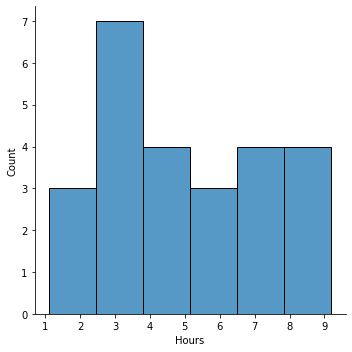

In [10]:
sns.displot(data['Hours'])

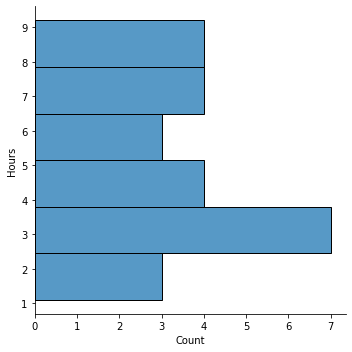

In [11]:
sns.displot(y= data['Hours'])

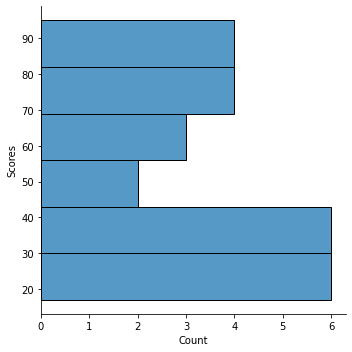

In [12]:
sns.displot(y= data['Scores'])

# Data Visualization

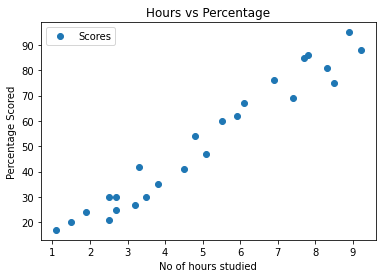

In [15]:
data.plot(x='Hours', y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('No of hours studied')
plt.ylabel('Percentage Scored')
plt.show()

# Specifying the Model

In [16]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [17]:
x_train,x_test, y_train, y_test= train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=0)

In [18]:
regressor = LinearRegression()  
regressor.fit(x_train , y_train)

LinearRegression()

In [19]:
print(regressor.intercept_)
print(regressor.coef_)

2.370815382341867
[9.78856669]


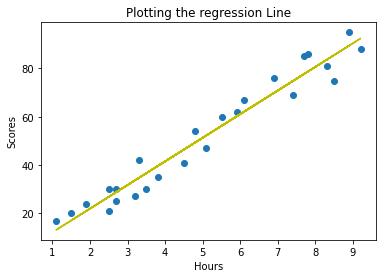

In [20]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x, y)
plt.plot(x, line,'y')
plt.title("Plotting the regression Line")
plt.ylabel('Scores')
plt.xlabel('Hours')
plt.show()

In [21]:
y_pred = regressor.predict(x_test)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [22]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


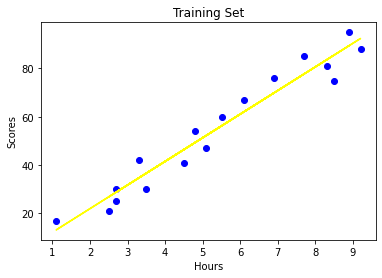

In [24]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,regressor.predict(x_train),color='yellow')
plt.title('Training Set')
plt.xlabel('Hours')
plt.ylabel('Scores');

In [25]:
print(regressor.predict([[9.25]]))

[92.91505723]


In [26]:
from sklearn import metrics 
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.4197278080276545
